# Bank Customer Churn Modeling

In [12]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import Dataset
df = pd.read_csv("E:\Pycharm Projects\Machine_Learning\GitHub\Churn Modeling\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Drop Rownum and CustomerID
df = df.drop(columns = ["RowNumber", "CustomerId", "Surname"]).copy()
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# df.dtypes
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
# Check Na's
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
df["Exited"] = df["Exited"].replace({1 : "Exited", 0 : "Not Exited"})

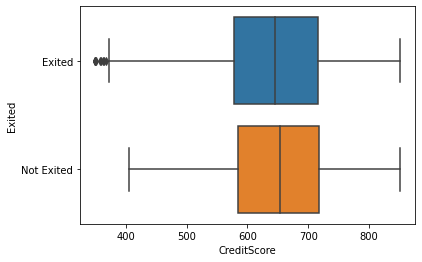

In [24]:
# Check the Distribution of CreditScore who has Exited and Not Exited
sns.boxplot(x = df["CreditScore"], y = df["Exited"])
plt.show()

Some of the Customers who have Exited have low credit score, but why is this low credit score, may be thay are not paying their bills correctly

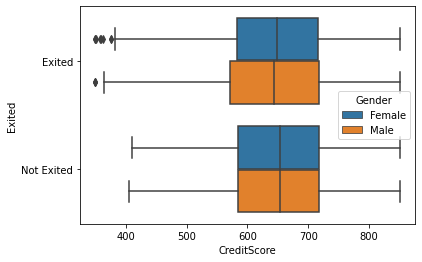

In [34]:
# Check the Distribution of CreditScore who has Exited and Not Exited
sns.boxplot(x = df["CreditScore"], y = df["Exited"], hue = df["Gender"])
plt.show()

### Lets check in which country highest percentage of churning is happening

<AxesSubplot:xlabel='Geography', ylabel='count'>

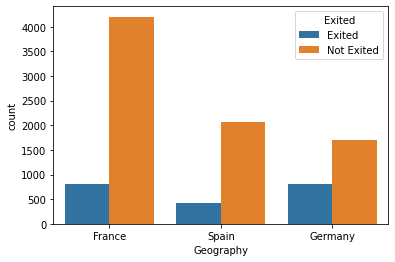

In [37]:
sns.countplot(x=df["Geography"], hue = df["Exited"])

In [41]:
df.groupby(["Geography", "Exited"]).count()

CreditScore  Gender   Age  Tenure  Balance  \
Geography Exited                                                   
France    Exited              810     810   810     810      810   
          Not Exited         4204    4204  4204    4204     4204   
Germany   Exited              814     814   814     814      814   
          Not Exited         1695    1695  1695    1695     1695   
Spain     Exited              413     413   413     413      413   
          Not Exited         2064    2064  2064    2064     2064   

                      NumOfProducts  HasCrCard  IsActiveMember  \
Geography Exited                                                 
France    Exited                810        810             810   
          Not Exited           4204       4204            4204   
Germany   Exited                814        814             814   
          Not Exited           1695       1695            1695   
Spain     Exited                413        413             413   
          Not Exited           2064       2064            2064   

                      EstimatedSalary  
Geography Exited                       
France    Exited                  810  
          Not Exited             4204  
Germany   Exited                  814  
          Not Exited             1695  
Spain     Exited                  413  
          Not Exited             2064

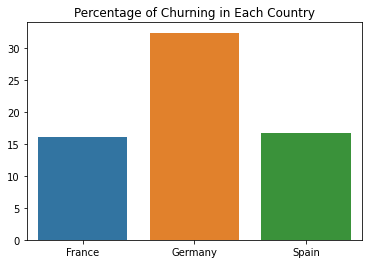

In [48]:
France = 810/(4204+810) * 100
Germany = 814/(814+1695) * 100
Spain = 413/(2064+413) * 100

sns.barplot(x = ["France", "Germany", "Spain"], y = [France, Germany, Spain])
plt.title("Percentage of Churning in Each Country")
plt.show()

So, Germany has hishest percentage of churning (32%) but why ?. What is happening with Germany

### Not Lets check what is percentage of male and female churning in germany?

In [49]:
df.groupby(["Geography", "Exited", "Gender"]).count()

CreditScore   Age  Tenure  Balance  \
Geography Exited     Gender                                       
France    Exited     Female          460   460     460      460   
                     Male            350   350     350      350   
          Not Exited Female         1801  1801    1801     1801   
                     Male           2403  2403    2403     2403   
Germany   Exited     Female          448   448     448      448   
                     Male            366   366     366      366   
          Not Exited Female          745   745     745      745   
                     Male            950   950     950      950   
Spain     Exited     Female          231   231     231      231   
                     Male            182   182     182      182   
          Not Exited Female          858   858     858      858   
                     Male           1206  1206    1206     1206   

                             NumOfProducts  HasCrCard  IsActiveMember  \
Geography Exited     Gender                                             
France    Exited     Female            460        460             460   
                     Male              350        350             350   
          Not Exited Female           1801       1801            1801   
                     Male             2403       2403            2403   
Germany   Exited     Female            448        448             448   
                     Male              366        366             366   
          Not Exited Female            745        745             745   
                     Male              950        950             950   
Spain     Exited     Female            231        231             231   
                     Male              182        182             182   
          Not Exited Female            858        858             858   
                     Male             1206       1206            1206   

                             EstimatedSalary  
Geography Exited     Gender                   
France    Exited     Female              460  
                     Male                350  
          Not Exited Female             1801  
                     Male               2403  
Germany   Exited     Female              448  
                     Male                366  
          Not Exited Female              745  
                     Male                950  
Spain     Exited     Female              231  
                     Male                182  
          Not Exited Female              858  
                     Male               1206

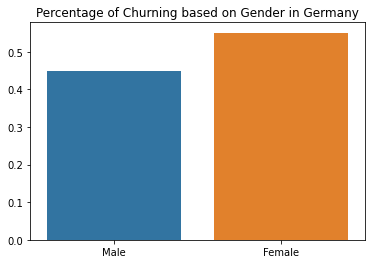

In [50]:
Male = 366/(366+448)
Female = 448/(366+448)
sns.barplot(x = ["Male", "Female"], y = [Male, Female])
plt.title("Percentage of Churning based on Gender in Germany")
plt.show()

Female percentage churning is more in germany. But why?
<br> lets check their Credit Score and Salary

In [51]:
df.groupby(["Geography", "Exited", "Gender"]).mean()

CreditScore        Age    Tenure        Balance  \
Geography Exited     Gender                                                    
France    Exited     Female   643.897826  45.332609  4.921739   67755.162630   
                     Male     639.308571  44.871429  5.102857   75710.827800   
          Not Exited Female   650.536369  37.098834  4.957246   58424.310061   
                     Male     651.631294  37.338743  5.041615   61774.503758   
Germany   Exited     Female   650.732143  44.828125  5.075893  119673.872321   
                     Male     643.964481  44.975410  4.920765  121202.242432   
          Not Exited Female   654.514094  37.343624  4.899329  118828.514362   
                     Male     652.278947  37.286316  5.100000  119896.529105   
Spain     Exited     Female   645.363636  43.610390  4.679654   71997.673680   
                     Male     650.175824  44.829670  4.626374   73167.867802   
          Not Exited Female   653.494172  38.011655  5.086247   56594.820688   
                     Male     651.115257  37.716418  5.122720   61871.626285   

                             NumOfProducts  HasCrCard  IsActiveMember  \
Geography Exited     Gender                                             
France    Exited     Female       1.510870   0.697826        0.373913   
                     Male         1.431429   0.708571        0.360000   
          Not Exited Female       1.556913   0.697946        0.549695   
                     Male         1.529754   0.714524        0.542239   
Germany   Exited     Female       1.466518   0.707589        0.368304   
                     Male         1.439891   0.710383        0.357923   
          Not Exited Female       1.538255   0.706040        0.528859   
                     Male         1.561053   0.724211        0.587368   
Spain     Exited     Female       1.597403   0.679654        0.333333   
                     Male         1.406593   0.664835        0.351648   
          Not Exited Female       1.566434   0.715618        0.566434   
                     Male         1.529022   0.687396        0.567993   

                             EstimatedSalary  
Geography Exited     Gender                   
France    Exited     Female    103626.025065  
                     Male      103193.839686  
          Not Exited Female     98526.820627  
                     Male       99734.445789  
Germany   Exited     Female     99884.458728  
                     Male       96591.601257  
          Not Exited Female    103987.042242  
                     Male      101181.577505  
Spain     Exited     Female    107544.095758  
                     Male       98661.099011  
          Not Exited Female     98900.649091  
                     Male       98390.161260

Their average balance and credit score seems fine, lets check minimum

In [53]:
df.groupby(["Geography", "Exited", "Gender"]).min()

CreditScore  Age  Tenure   Balance  \
Geography Exited     Gender                                       
France    Exited     Female          350   22       0      0.00   
                     Male            350   18       0      0.00   
          Not Exited Female          410   18       0      0.00   
                     Male            408   18       0      0.00   
Germany   Exited     Female          351   19       0  64497.94   
                     Male            350   20       0  62389.03   
          Not Exited Female          410   18       0  32197.64   
                     Male            405   18       0  27288.43   
Spain     Exited     Female          358   22       0      0.00   
                     Male            350   18       0      0.00   
          Not Exited Female          419   19       0      0.00   
                     Male            413   18       0      0.00   

                             NumOfProducts  HasCrCard  IsActiveMember  \
Geography Exited     Gender                                             
France    Exited     Female              1          0               0   
                     Male                1          0               0   
          Not Exited Female              1          0               0   
                     Male                1          0               0   
Germany   Exited     Female              1          0               0   
                     Male                1          0               0   
          Not Exited Female              1          0               0   
                     Male                1          0               0   
Spain     Exited     Female              1          0               0   
                     Male                1          0               0   
          Not Exited Female              1          0               0   
                     Male                1          0               0   

                             EstimatedSalary  
Geography Exited     Gender                   
France    Exited     Female           738.88  
                     Male             123.07  
          Not Exited Female           178.19  
                     Male              90.07  
Germany   Exited     Female            91.75  
                     Male              11.58  
          Not Exited Female           447.73  
                     Male             343.38  
Spain     Exited     Female           582.59  
                     Male             417.41  
          Not Exited Female           479.54  
                     Male             735.79

So now we found the reason, People who exited in germany have lowest minimum salary compared to other countries, and German males have least min salary of 11.58 dollors. which can be the reason for exiting the bank.

### Lets check which age people are churning more

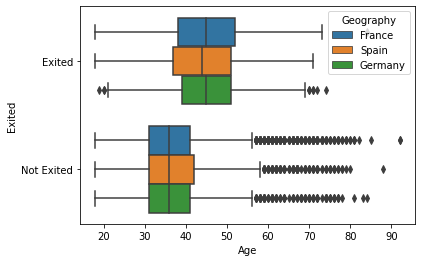

In [57]:
sns.boxplot(x = df["Age"], y = df["Exited"], hue = df["Geography"])
plt.show()

So churned customers have relatively more Age (between 40 and 50). but why?